In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

Compiling complete dataframe

In [2]:
df_knn = pd.read_csv("df_alpine_lsa.csv")

In [3]:
df_knn

,index,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,hybrid,indica,sativa,anxiety,...,sweet,tar,tea,tobacco,tree,tropical,vanilla,violet,woody,X..Alpha-Pinene
0,0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.106952
1,0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.106952
2,1,0.232158,-0.045496,0.187131,-0.000936,0.018518,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0.106952
3,2,0.261225,0.100324,-0.043622,0.141860,-0.034786,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0.106952
4,3,0.243491,0.034313,0.080290,-0.165609,0.019773,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0.106952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,42967,0.175310,0.233013,0.002148,0.114778,0.056574,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.021390
59996,42970,0.440634,-0.078839,0.085152,0.087878,-0.133604,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.021390
59997,42971,0.184573,-0.137296,-0.095301,0.181735,-0.042683,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.021390
59998,42973,0.055494,0.003622,-0.050252,-0.024795,-0.031141,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.021390


In [4]:
df_knn.columns.to_list()

['index',
 'lsa_0',
 'lsa_1',
 'lsa_2',
 'lsa_3',
 'lsa_4',
 'hybrid',
 'indica',
 'sativa',
 'anxiety',
 'anxious',
 'aroused',
 'arthritis',
 'creative',
 'depression',
 'dizzy',
 'dry eyes',
 'dry mouth',
 'energetic',
 'epilepsy',
 'euphoric',
 'eye pressure',
 'fatigue',
 'focused',
 'giggly',
 'happy',
 'headache',
 'hungry',
 'migraines',
 'pain',
 'paranoid',
 'relaxed',
 'seizures',
 'sleepy',
 'spasticity',
 'stress',
 'talkative',
 'tingly',
 'uplifted',
 'ammonia',
 'apple',
 'apricot',
 'berry',
 'blue cheese',
 'blueberry',
 'butter',
 'cheese',
 'chemical',
 'chestnut',
 'citrus',
 'coffee',
 'diesel',
 'earthy',
 'flowery',
 'fruit',
 'grape',
 'grapefruit',
 'honey',
 'lavender',
 'lemon',
 'lime',
 'mango',
 'menthol',
 'mint',
 'nutty',
 'orange',
 'peach',
 'pear',
 'pepper',
 'pine',
 'pineapple',
 'plum',
 'pungent',
 'rose',
 'sage',
 'skunk',
 'spicy/herbal',
 'strawberry',
 'sweet',
 'tar',
 'tea',
 'tobacco',
 'tree',
 'tropical',
 'vanilla',
 'violet',
 'wood

Splitting dependent and independent variables

In [5]:
X = df_knn.drop(['X..Alpha-Pinene', 'index'], axis = 1)
y = df_knn[['X..Alpha-Pinene']]

Plotting histograms on target variable

In [6]:
y_array = y.to_numpy()
y_array

array([[0.10695187],
       [0.10695187],
       [0.10695187],
       ...,
       [0.02139037],
       [0.02139037],
       [0.02139037]])

<AxesSubplot:ylabel='Count'>

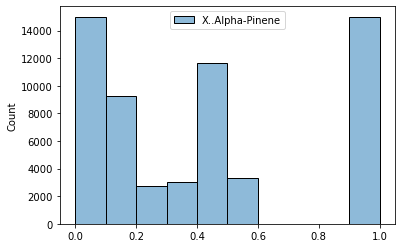

In [7]:
sns.histplot(y, bins = 10)

Train test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [9]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.25)

kNN modeling (before Feature selection and Hyperparameter Tuning)

In [10]:
knreg = KNeighborsRegressor()
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [11]:
mean_absolute_error(y_val, y_pred_knreg)

0.0385213188282306

In [12]:
mean_squared_error(y_val, y_pred_knreg)

0.007270851794339971

In [13]:
mean_squared_error(y_val, y_pred_knreg, squared = False)

0.08526928986651625

In [14]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.9641663655121867

In [15]:
#val
r2_score(y_val, y_pred_knreg)

0.9459767816856086

Residual plots for each target variable

Feature Selection

In [16]:
rfreg = RandomForestRegressor()

In [17]:
selector = SelectFromModel(rfreg).fit(X_train1, y_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


In [18]:
selector.estimator_.feature_importances_

array([7.18391324e-02, 4.54552269e-02, 5.57965567e-02, 7.18097142e-02,
       6.39148488e-02, 2.89798395e-03, 3.62721551e-01, 4.57938632e-03,
       4.82849921e-06, 7.42258264e-04, 8.10944475e-03, 6.33870950e-08,
       8.12315953e-03, 7.53291079e-06, 1.60468543e-03, 1.86523675e-03,
       5.53619720e-03, 1.28590632e-03, 5.64211420e-08, 1.06635925e-02,
       8.51246050e-09, 3.85101050e-08, 4.58960602e-03, 3.22089659e-03,
       6.08619606e-03, 2.61712168e-04, 1.83062833e-02, 5.21193234e-06,
       3.25776558e-08, 1.40308726e-03, 1.63793164e-02, 8.19545830e-08,
       2.45563099e-03, 1.22504693e-07, 1.47958964e-07, 5.95987106e-03,
       4.41269089e-03, 1.73425212e-03, 1.74373157e-04, 2.77769228e-05,
       1.81565986e-04, 7.41635682e-03, 4.22455454e-05, 3.57539694e-02,
       1.37250848e-04, 1.72231578e-03, 2.26499689e-04, 7.65352394e-05,
       1.25103869e-03, 1.10240690e-03, 4.05423034e-03, 3.49807531e-02,
       8.14480570e-04, 5.72816727e-04, 1.54414624e-03, 1.13831074e-04,
      

In [19]:
selector.threshold_

0.011627906976744186

In [20]:
mask = selector.get_support()

In [21]:
mask

array([ True,  True,  True,  True,  True, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [22]:
selected_features = X.columns[mask]

In [23]:
selected_X = df_knn[selected_features]
selected_X

,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,indica,hungry,relaxed,blueberry,earthy,mango
0,0.341025,0.182753,0.008214,0.140406,-0.156943,0,1,1,0,0,0
1,0.341025,0.182753,0.008214,0.140406,-0.156943,0,1,1,0,0,0
2,0.232158,-0.045496,0.187131,-0.000936,0.018518,0,0,1,0,0,0
3,0.261225,0.100324,-0.043622,0.141860,-0.034786,0,1,0,0,0,0
4,0.243491,0.034313,0.080290,-0.165609,0.019773,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
59995,0.175310,0.233013,0.002148,0.114778,0.056574,1,0,1,0,0,0
59996,0.440634,-0.078839,0.085152,0.087878,-0.133604,1,0,0,0,0,0
59997,0.184573,-0.137296,-0.095301,0.181735,-0.042683,1,0,0,0,0,0
59998,0.055494,0.003622,-0.050252,-0.024795,-0.031141,1,0,0,0,0,0


In [24]:
selected_X.columns.to_list()

['lsa_0',
 'lsa_1',
 'lsa_2',
 'lsa_3',
 'lsa_4',
 'indica',
 'hungry',
 'relaxed',
 'blueberry',
 'earthy',
 'mango']

In [25]:
import joblib

joblib.dump(selected_X, "selected_X_knn_lsa_elbow_alpine.pkl")
joblib.dump(selector, "selector_knn_lsa_elbow_alpine.pkl")

['selector_knn_lsa_elbow_alpine.pkl']

Train test split (after Feature Selection)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, random_state=1, test_size=0.2)

In [27]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

In [28]:
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [29]:
mean_absolute_error(y_val, y_pred_knreg)

0.04180094707852062

In [30]:
mean_squared_error(y_val, y_pred_knreg)

0.008239428423080557

In [31]:
mean_squared_error(y_val, y_pred_knreg, squared = False)

0.09077129735263541

In [32]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.9571210824156616

In [33]:
#val
r2_score(y_val, y_pred_knreg)

0.9385549617119681

Hyperparameter Tuning

In [34]:
parameters_knn = {'n_neighbors' : [5, 7, 9, 11, 13, 15], 
              'weights': ['uniform', 'distance']}

In [35]:
rscv_knn = RandomizedSearchCV(knreg,  
                     parameters_knn,   
                     cv=5, 
                     scoring='neg_mean_absolute_error')

In [37]:
rscv_knn.fit(X_train1, y_train1)

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(),
                   param_distributions={'n_neighbors': [5, 7, 9, 11, 13, 15],
                                        'weights': ['uniform', 'distance']},
                   scoring='neg_mean_absolute_error')

In [38]:
rscv_knn.best_params_

{'weights': 'distance', 'n_neighbors': 5}

kNN (after hyperparameter tuning)

In [39]:
knreg_ht = KNeighborsRegressor(n_neighbors = 5, weights = 'distance')
knreg_ht.fit(X_train1, y_train1)
y_pred_knreg_ht = knreg_ht.predict(X_val)
y_pred_knreg_ht_r2 = knreg_ht.predict(X_train1)

In [40]:
mean_absolute_error(y_val, y_pred_knreg_ht)

0.02477932901866032

In [41]:
mean_squared_error(y_val, y_pred_knreg_ht, squared = False)

0.0760925745267094

In [42]:
#train
r2_score(y_train1, y_pred_knreg_ht_r2)

0.9863362542690731

In [43]:
#val
r2_score(y_val, y_pred_knreg_ht)

0.9568208299457893

Residual plots after Hyperparameter Tuning

Predicting model on the test set

In [44]:
y_pred_knreg_test = knreg_ht.predict(X_test)

In [45]:
joblib.dump(y_pred_knreg_test, "y_pred_knreg_test_lsa_elbow_alpine.pkl")
joblib.dump(y_test, "y_test_knreg_lsa_elbow_alpine.pkl")

['y_test_knreg_lsa_elbow_alpine.pkl']

In [46]:
mean_absolute_error(y_test, y_pred_knreg_test)

0.02586107761991997

In [47]:
mean_squared_error(y_test, y_pred_knreg_test)

0.006284227871407527

In [48]:
mean_squared_error(y_test, y_pred_knreg_test, squared = False)

0.07927312199861644

In [49]:
r2_score(y_test, y_pred_knreg_test)

0.9530014042959823

In [50]:
y_test

,X..Alpha-Pinene
15281,1.000000
21435,1.000000
44536,0.443850
13518,1.000000
47529,0.113369
...,...
6636,0.010695
25027,0.235294
8294,0.005348
16607,1.000000


In [51]:
type(y_pred_knreg_test)

numpy.ndarray

Error analysis

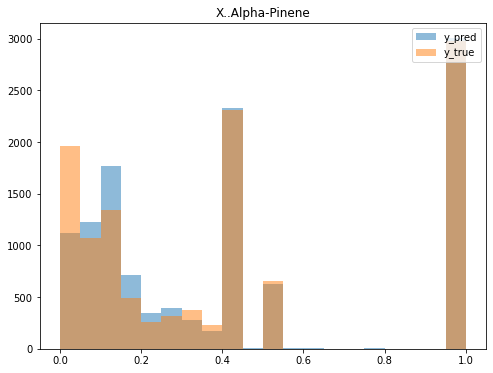

<Figure size 432x288 with 0 Axes>

In [52]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..Alpha-Pinene"  # specify the target variable name
ax.hist(y_pred_knreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_knn_lsa_elbow_alpine.png')

Pearson R

In [53]:
corr_coef, p_value = pearsonr(y_pred_knreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.977
P-value: 0.000


<AxesSubplot:>

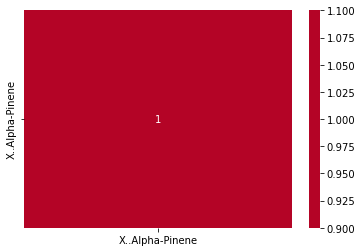

In [54]:
corr_matrix = y_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)